In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load/

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-symptom-description-dataset/symptom_Description.csv
/kaggle/input/disease-symptom-description-dataset/Symptom-severity.csv
/kaggle/input/disease-symptom-description-dataset/symptom_precaution.csv
/kaggle/input/disease-symptom-description-dataset/dataset.csv


In [10]:
dataset= pd.read_csv('/kaggle/input/disease-symptom-description-dataset/dataset.csv')
dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dataset['Disease'].nunique()

41

In [12]:
df=dataset

In [13]:
symptom_columns = df.columns[1:]  # Exclude the first column (Disease)
unique_symptoms = df[symptom_columns].values.ravel().tolist()
unique_symptoms = list(set(unique_symptoms))
unique_symptoms


[' weight_loss',
 ' internal_itching',
 ' enlarged_thyroid',
 ' blackheads',
 ' blurred_and_distorted_vision',
 ' irregular_sugar_level',
 ' distention_of_abdomen',
 ' movement_stiffness',
 ' pain_in_anal_region',
 ' sinus_pressure',
 ' obesity',
 ' headache',
 ' redness_of_eyes',
 ' spotting_ urination',
 ' polyuria',
 ' runny_nose',
 'itching',
 ' continuous_sneezing',
 ' irritability',
 ' bruising',
 ' irritation_in_anus',
 ' shivering',
 ' spinning_movements',
 ' weight_gain',
 ' high_fever',
 ' dizziness',
 ' weakness_in_limbs',
 ' dehydration',
 ' sweating',
 ' passage_of_gases',
 ' lack_of_concentration',
 ' bloody_stool',
 ' brittle_nails',
 ' stomach_bleeding',
 ' painful_walking',
 ' drying_and_tingling_lips',
 ' small_dents_in_nails',
 ' malaise',
 ' dark_urine',
 ' dischromic _patches',
 ' coma',
 ' anxiety',
 ' rusty_sputum',
 ' foul_smell_of urine',
 ' muscle_pain',
 ' history_of_alcohol_consumption',
 ' altered_sensorium',
 ' ulcers_on_tongue',
 ' throat_irritation',
 ' 

In [14]:
for symptom in unique_symptoms:
    df[symptom] = df[symptom_columns].apply(lambda row: int(symptom in row.values), axis=1)
df.drop(symptom_columns, axis=1, inplace=True)



In [15]:
df.columns


Index([                      'Disease',                  ' weight_loss',
                   ' internal_itching',             ' enlarged_thyroid',
                         ' blackheads', ' blurred_and_distorted_vision',
              ' irregular_sugar_level',        ' distention_of_abdomen',
                 ' movement_stiffness',          ' pain_in_anal_region',
       ...
                         ' belly_pain',                 ' yellow_urine',
                       ' unsteadiness',          ' acute_liver_failure',
               ' cold_hands_and_feets',                  ' indigestion',
          ' weakness_of_one_body_side',                        ' cough',
                 ' increased_appetite',        ' swollen_blood_vessels'],
      dtype='object', length=133)

In [16]:
for column in df.columns[1:]:
    new_column_name = str(column).lstrip()  # Convert column name to string before applying lstrip
    df.rename(columns={column: new_column_name}, inplace=True)

In [17]:
#Removing nan
if 'nan' in df.columns:
    df = df.drop('nan', axis=1)
    

In [76]:
# #merging same disease symptom in 1 row
# consolidated_df = df.groupby('Disease').max().reset_index()

# # print(consolidated_df)
# consolidated_df.tail()

,Disease,throat_irritation,anxiety,muscle_weakness,toxic_look_(typhos),irregular_sugar_level,fatigue,receiving_unsterile_injections,blood_in_sputum,pain_in_anal_region,...,patches_in_throat,acute_liver_failure,polyuria,shivering,vomiting,abdominal_pain,back_pain,loss_of_smell,lack_of_concentration,pain_behind_the_eyes
36,Tuberculosis,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
37,Typhoid,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
38,Urinary tract infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,Varicose veins,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,hepatitis A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [22]:
#loading final df
df.to_csv("processed_data.csv", index=False)
final_df= pd.read_csv('/kaggle/working/processed_data.csv')

In [23]:
final_df.shape

(4920, 132)

In [24]:
X=final_df.iloc[:,1:].values
X.shape

(4920, 131)

In [35]:
y=final_df.iloc[:,0].values
y.shape

(4920,)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

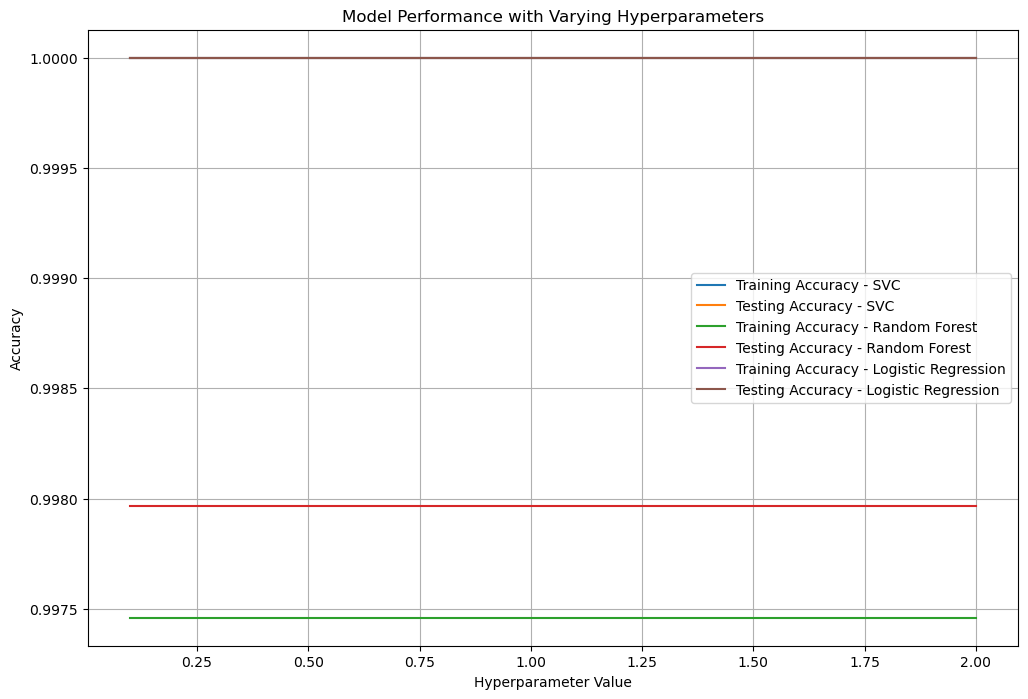

In [55]:
# Initialize an array to store accuracy values for each model
models = [SVC, RandomForestClassifier, LogisticRegression]
model_names = ['SVC', 'Random Forest', 'Logistic Regression']

# Vary hyperparameters for each model
hyperparameters = [
    {'C': 0.1, 'kernel': 'linear'},
    {'n_estimators': 50, 'max_depth': 10, 'random_state': 42},
    {'C': 0.1, 'max_iter': 100}
]

plt.figure(figsize=(12, 8))

for model, model_name, params in zip(models, model_names, hyperparameters):
    train_accuracies = []
    test_accuracies = []
    
    # Vary hyperparameter values
    param_values = np.linspace(0.1, 2, 10)
    
    for value in param_values:
        # Create the model with varying hyperparameters
        clf = model(**params)
        
        # Train the model
        clf.fit(X_train, y_train)
        
        # Predict on training and testing sets
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        
        # Calculate accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    plt.plot(param_values, train_accuracies, label=f'Training Accuracy - {model_name}')
    plt.plot(param_values, test_accuracies, label=f'Testing Accuracy - {model_name}')

plt.xlabel('Hyperparameter Value')
plt.ylabel('Accuracy')
plt.title('Model Performance with Varying Hyperparameters')
plt.legend()
plt.grid(True)
plt.show()

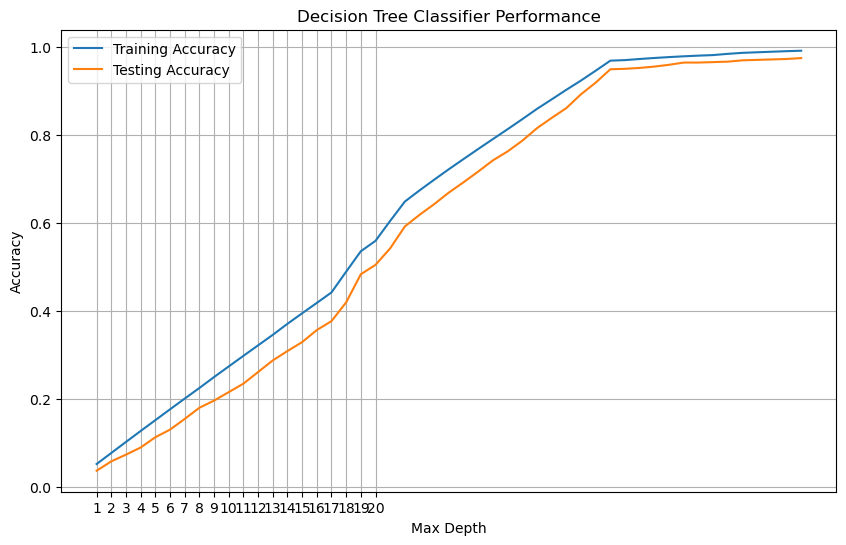

In [57]:
#uSING DECISION TREE

# Initialize an array to store accuracy values
train_accuracies = []
test_accuracies = []
depths = range(1, 50)  # Vary the depth from 1 to 20

# Train Decision Trees with different depths
for depth in depths:
    # Create the Decision Tree classifier
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on training and testing sets
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Performance')
plt.legend()
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.show()

In [58]:
# TESTING (this should come)
X_test[4] , y_test[4] 

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'Chronic cholestasis')

In [60]:
# Model Output
classifier.predict(X_test[4].reshape(1,131))

array(['Chronic cholestasis'], dtype=object)

In [61]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.975609756097561
